In [2]:
import pandas as pd
import unidecode as udec
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from pathlib import Path

In [3]:
search_path = Path('../data/search_terms.csv')
search_df = pd.read_csv(search_path)

In [3]:
search_df.head()

,search_engine_keyword,session_entry_url,search_engine_impressions,search_engine_clicks,search_engine_ctr,search_engine_average_position
0,corona italie,https://www.rijksoverheid.nl/ministeries/minis...,249739,5701,0.022828,8.258902
1,buitenlandse zaken,https://www.rijksoverheid.nl/ministeries/minis...,220500,4043,0.018336,1.864417
2,corona spanje,https://www.rijksoverheid.nl/ministeries/minis...,209144,6433,0.030759,8.031514
3,corona duitsland,https://www.rijksoverheid.nl/ministeries/minis...,206444,7192,0.034838,5.631605
4,ministerie van buitenlandse zaken,https://www.rijksoverheid.nl/ministeries/minis...,152908,4061,0.026558,2.333370


# Pre-processing

In [4]:
class PreProcessing:
    
    #Rename search keyword
    def rename(dataf):

        renamed_df = (dataf.rename({'search_engine_keyword': 'search_keyword'}, axis='columns'))

        return renamed_df
    
    
    
    
    
    #Clean keywords by setting to lowercase, unidecode and replace trailing space
    def clean_keywords(dataf):

        clean_search_df = (dataf.assign(search_keyword = (dataf['search_keyword']
                                                              .str.lower()
                                                              .apply(udec.unidecode)
                                                              .str.replace(" ", "")
                                                         )
                                        )
                          )

        return clean_search_df

    #Remove certain keywords
    def filter_search(dataf):

        words_to_remove = ('reisadvie|covid|coronavirus|corona|bezoek|spanje|china|frankrijk|italie|marokko|turkije'
                           'duitsland|griekenland|egypte|jordanie|oostenrijk|oekraine|indonesie|curacao|coronaspanje|zweden|armenie'
                           'hongarije|nigeria|japan|kroatie|coronafrankrijk|dubai|mexico|ghana|hongkong|belgie|portugal|suriname'
                           'vietnam|thailand|visite|sardinie|repatriering|rivm|corona|reisadvies|mond(kap|masker)|besmetting'
                           'lockdown|gebied|oranje|reizen|quarantaine|toerisme|vakantie|buitenlandsezaken|buza|minbuza|rijksoverheid'
                           'covid|land|belgie|frankrijk|spanje|zweden|curacao'
                          )

        return dataf[~dataf['search_keyword'].str.contains(words_to_remove)]    


    
    #Counter for each row
    def count_row(dataf):

        count_df = dataf.assign(count = 1)

        return count_df
    
    #Create dictionary for WordCloud
    def words_dictionary(dataf):
        
        group_df = (dataf.groupby('search_keyword')
                         .sum()
                         .sort_values('count', ascending=False)
                   )
        
        dict_searches = group_df.to_dict()['count']
        
        return dict_searches

In [5]:
clean_search_df = (search_df.pipe(PreProcessing.rename)
                            .pipe(PreProcessing.clean_keywords)
                            .pipe(PreProcessing.filter_search)
                            .pipe(PreProcessing.count_row)
                  )

C:\Users\CasperDamen\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [6]:
clean_search_df.head()

,search_keyword,session_entry_url,search_engine_impressions,search_engine_clicks,search_engine_ctr,search_engine_average_position,count
55,beiroet,https://www.rijksoverheid.nl/ministeries/minis...,12588,243,0.019304,6.244836,1
91,rijksoverheid,https://www.rijksoverheid.nl/ministeries/minis...,7402,9,0.001216,2.000135,1
100,rijksoverheid,https://www.rijksoverheid.nl/ministeries/minis...,6823,24,0.003518,2.000440,1
124,wereldtentoonstelling2020,https://www.rijksoverheid.nl/ministeries/minis...,5510,300,0.054446,2.475136,1
132,ambassadeur,https://www.rijksoverheid.nl/ministeries/minis...,5076,14,0.002758,9.896375,1


In [7]:
dict_searches = clean_search_df.pipe(PreProcessing.words_dictionary)

# Generate WordCloud

In [4]:
class WordCloudModel:
    
    def __init__(self, width, height, background_color):
        """
        - width: The width of the wordcloud (int)
        - height: The height of the wordcloud (int)
        - background_color: The color of the wordcloud background (str)
        """
        self.width = width
        self.height = height
        self.background_color =  background_color

        
    def draw_wordcloud(self, dict_words, figsize):
        
        self.dict_words = dict_words
        self.figsize = figsize
        
        self.wordcloud = WordCloud(width=self.width, 
                                   height=self.height,
                                   background_color=self.background_color)
                         
        
        self.wordcloud.fit_words(dict_words)
        
        self.wordcloud.recolor(random_state=8)
        
        plt.figure(figsize = self.figsize, facecolor = None)
        plt.imshow(self.wordcloud)
        plt.axis("off")
        plt.tight_layout(pad=0)

In [9]:
wordcloud = WordCloudModel(width=1024, 
                           height=768, 
                           background_color='white'
                          )

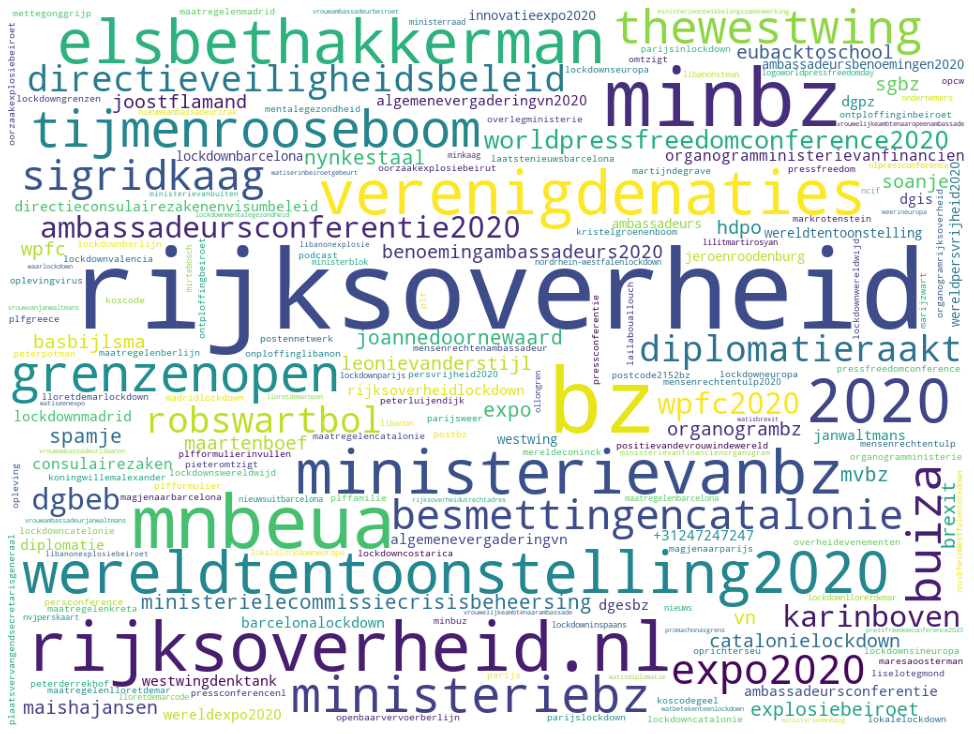

In [10]:
wordcloud.draw_wordcloud(dict_searches, (20,10))